This aims to predicti per district and not per tile.

In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# Load your CSV
df = pd.read_csv("/home/elsherif/Desktop/Thesis/ViewPython/data/CleanupDataSet/final_model.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12479 entries, 0 to 12478
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tile                         12479 non-null  object 
 1   total_rooftops               12479 non-null  int64  
 2   rooftops_without_solar       12479 non-null  int64  
 3   square_meters_with_solar_m2  12479 non-null  float64
 4   panel_area_m2                12479 non-null  float64
 5   district_number              12479 non-null  int64  
 6   year                         12479 non-null  int64  
 7   Unemployment_Rate            12479 non-null  float64
 8   Average_Age                  12479 non-null  float64
 9   Elderly_Population           12479 non-null  float64
 10  Young_Population             12479 non-null  float64
 11  Total_Population             12479 non-null  int64  
 12  employed                     12479 non-null  float64
 13  tile_encoded    

In [73]:
district_df = (
    df
    .groupby(["district_number", "year"], as_index=False)
    .agg({
        # SUM features
        "total_rooftops": "sum",
        "rooftops_without_solar": "sum",
        "square_meters_with_solar_m2": "sum",
        "panel_area_m2": "sum",
        "panel_area_lag1": "sum",


        # MEAN features
        "Total_Population": "sum",
        "Elderly_Population": "sum",
        "Young_Population": "sum",
        "Unemployment_Rate": "mean",
        "Average_Age": "mean",
        "employed" : "mean"
    })
)


In [74]:
district_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   district_number              184 non-null    int64  
 1   year                         184 non-null    int64  
 2   total_rooftops               184 non-null    int64  
 3   rooftops_without_solar       184 non-null    int64  
 4   square_meters_with_solar_m2  184 non-null    float64
 5   panel_area_m2                184 non-null    float64
 6   panel_area_lag1              184 non-null    float64
 7   Total_Population             184 non-null    int64  
 8   Elderly_Population           184 non-null    float64
 9   Young_Population             184 non-null    float64
 10  Unemployment_Rate            184 non-null    float64
 11  Average_Age                  184 non-null    float64
 12  employed                     184 non-null    float64
dtypes: float64(8), int64

In [75]:
district_df.head(10)

,district_number,year,total_rooftops,rooftops_without_solar,square_meters_with_solar_m2,panel_area_m2,panel_area_lag1,Total_Population,Elderly_Population,Young_Population,Unemployment_Rate,Average_Age,employed
0,1,2006,589,451,515994.250,10816.335,12163.415,490776,82004.0,47918.0,3.7,42.6,74.9
1,1,2009,610,420,763786.758,24625.206,10816.335,492232,85410.0,50076.0,2.8,42.5,74.0
2,1,2012,578,413,650589.294,14190.911,24625.206,521248,86658.0,56134.0,2.1,41.9,74.0
3,1,2015,641,491,694887.747,15818.207,14190.911,549172,90740.0,60372.0,2.3,41.8,74.0
4,1,2018,564,422,628974.357,10977.157,15818.207,548600,89232.0,63726.0,2.1,41.7,73.4
5,1,2020,597,464,524832.486,11371.195,10977.157,544960,88608.0,65624.0,2.7,41.8,73.3
6,1,2022,621,463,632525.779,13036.365,11371.195,541008,86840.0,65702.0,2.1,41.6,73.5
7,1,2024,600,454,582289.704,11441.817,13036.365,542776,86996.0,64142.0,3.0,41.7,73.8
8,2,2006,1118,951,570845.772,8196.166,11178.208,1829440,213160.0,184600.0,5.4,39.6,79.3
9,2,2009,1082,821,899446.262,21414.943,8196.166,1857840,211240.0,193360.0,4.1,39.2,79.5


In [76]:
district_df['panel_area_log'] = np.log1p(district_df['panel_area_m2'])


In [77]:
district_df

,district_number,year,total_rooftops,rooftops_without_solar,square_meters_with_solar_m2,panel_area_m2,panel_area_lag1,Total_Population,Elderly_Population,Young_Population,Unemployment_Rate,Average_Age,employed,panel_area_log
0,1,2006,589,451,515994.250,10816.335,12163.415,490776,82004.0,47918.0,3.7,42.6,74.9,9.288905
1,1,2009,610,420,763786.758,24625.206,10816.335,492232,85410.0,50076.0,2.8,42.5,74.0,10.111566
2,1,2012,578,413,650589.294,14190.911,24625.206,521248,86658.0,56134.0,2.1,41.9,74.0,9.560427
3,1,2015,641,491,694887.747,15818.207,14190.911,549172,90740.0,60372.0,2.3,41.8,74.0,9.668980
4,1,2018,564,422,628974.357,10977.157,15818.207,548600,89232.0,63726.0,2.1,41.7,73.4,9.303663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,25,2015,3110,2845,292754.389,15464.212,19301.390,2547204,493120.0,312616.0,3.8,42.5,70.2,9.646348
180,25,2018,3143,2857,303005.510,18630.374,15836.149,2714208,510192.0,346608.0,3.1,42.2,70.1,9.832602
181,25,2020,3343,3081,252987.421,16649.054,18630.374,2722992,510240.0,359280.0,4.2,42.3,70.1,9.720169
182,25,2022,3254,2920,310594.541,21874.124,16649.054,2729040,496320.0,361872.0,3.7,42.2,70.3,9.993105


In [112]:
feature_cols = [
    'total_rooftops',
    # 'rooftops_without_solar',
    # 'square_meters_with_solar_m2',
    'Unemployment_Rate',
    'Average_Age',
    'Elderly_Population',
    'Young_Population',
    'Total_Population',
    "employed",
    # 'tile_encoded',
    # 'panel_area_lag1',
]

# Drop rows with missing lag values
df_model = district_df.dropna(subset=feature_cols + ['panel_area_log'])

X = df_model[feature_cols]
y = df_model['panel_area_log']


In [113]:
# Sort by time (CRITICAL)
df_model = df_model.sort_values("year")

# Define years
test_year = df_model["year"].max()
val_year  = df_model[df_model["year"] < test_year]["year"].max()

# Split dataframe
train_df = df_model[df_model["year"] < val_year]
val_df   = df_model[df_model["year"] == val_year]
test_df  = df_model[df_model["year"] == test_year]

# Features and target
X_train = train_df[feature_cols]
y_train = train_df["panel_area_log"]

X_val   = val_df[feature_cols]
y_val   = val_df["panel_area_log"]

X_test  = test_df[feature_cols]
y_test  = test_df["panel_area_log"]

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score, root_mean_squared_error

model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

from sklearn.metrics import r2_score, root_mean_squared_error

# Predict
y_pred = model.predict(X_test)

# R2 score
print("R2 score:", r2_score(y_test, y_pred))

# RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)



R2 score: 0.8728926937042305
RMSE: 0.31427195127025503


In [115]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)          # inverse of log1p
y_test_real = np.expm1(y_test.values)  # convert back to original scale


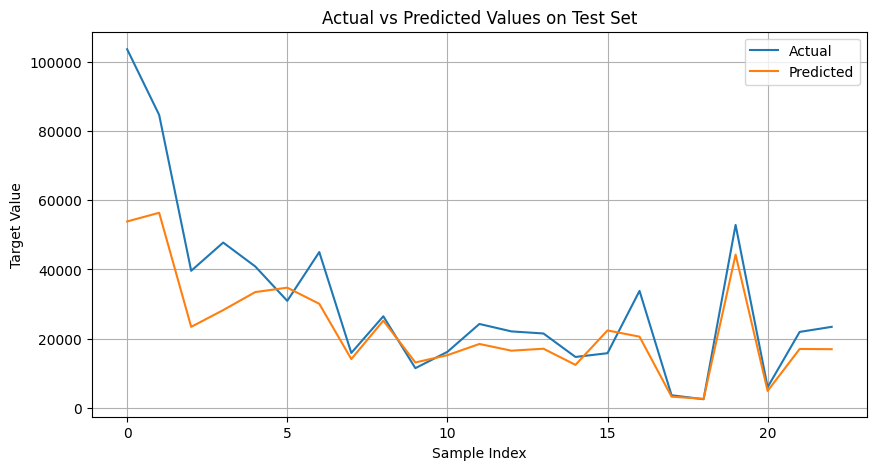

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test_real, label="Actual")   # Add markers to see points clearly
plt.plot(y_pred, label="Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values on Test Set")
plt.legend()
plt.grid(True)
plt.show()


In [107]:
y_pred

array([59672.27418871, 56970.52108235, 31705.35982466, 35594.86967577,
       35420.54711452, 35971.24217644, 36808.00793099, 13497.38871764,
       25133.89290475, 11637.70098455, 15213.86277153, 20169.74325239,
       17275.22874318, 20456.54585132, 11269.15361535, 14554.92939961,
       27263.4020135 ,  3418.79870168,  2583.96486135, 46147.37624993,
        4964.46078198, 16891.44449324, 18356.00503763])

In [91]:
import shap


In [117]:
explainer = shap.TreeExplainer(model)


In [118]:
X_shap = X_val.copy()

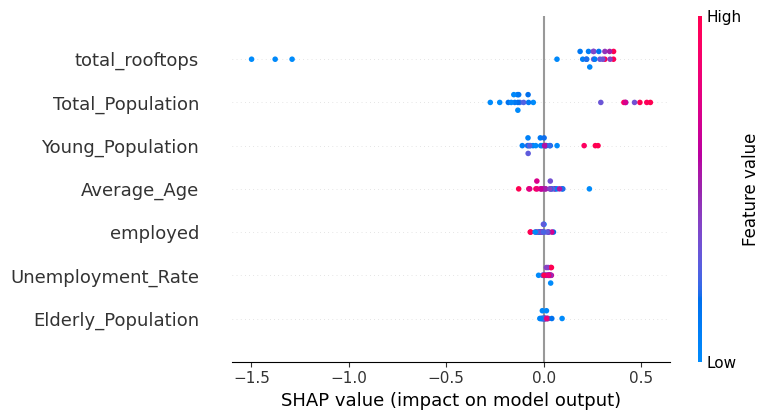

In [119]:
shap_values = explainer.shap_values(X_shap)
shap.summary_plot(shap_values, X_shap)

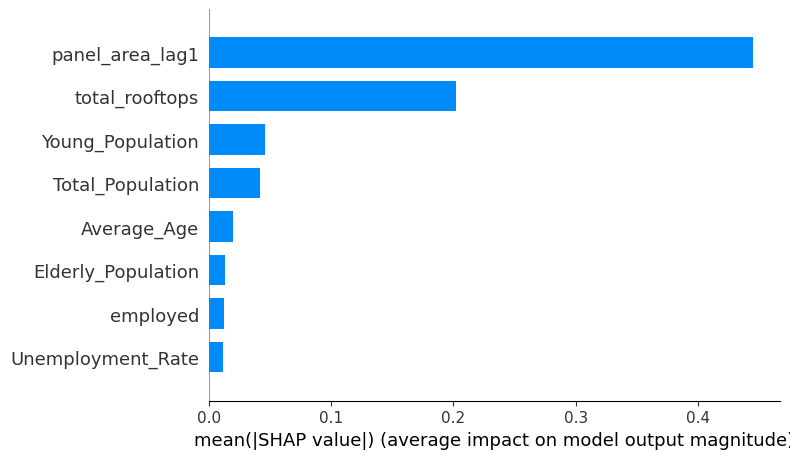

In [111]:
shap.summary_plot(
    shap_values,
    X_shap,
    plot_type="bar"
)
